## ThinkDSP

This notebook contains code examples from Chapter 2: Harmonics

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [130]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

## Waveforms and harmonics

Create a triangle signal and plot a 3 period segment.

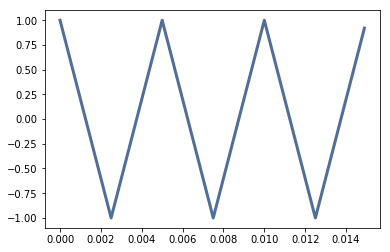

In [131]:
signal = thinkdsp.TriangleSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

In [132]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

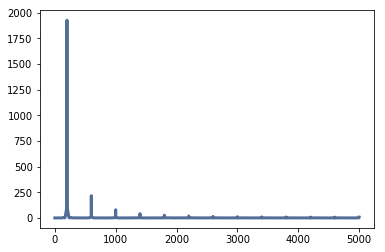

In [133]:
tripectrum = wave.make_spectrum()
tripectrum.plot()

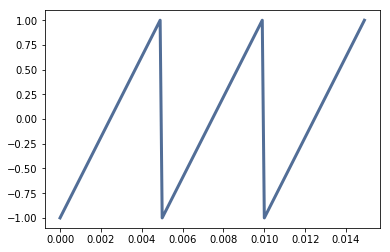

In [134]:
signal = thinkdsp.SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()

In [135]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()
wave.make_audio()

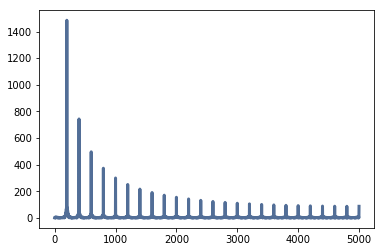

In [136]:
sawpectrum = wave.make_spectrum()
sawpectrum.plot()

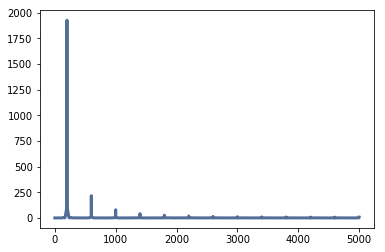

In [137]:
tripectrum.plot()

2.2 톱니파와 삼각파의 스펙트럼을 비교해 보면 평균적으로 톱니파의 값이 높은 편이며, 함수가 좀더 위로 올라가 있다고 표현할 수 있을 것 같습니다.

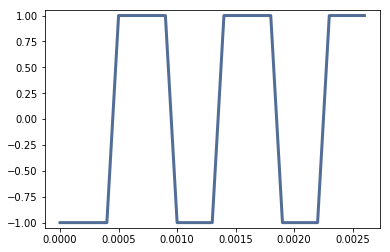

In [138]:
signal = thinkdsp.SquareSignal(1100)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
thinkplot.config(ylim=[-1.05, 1.05], legend=False)

In [139]:
wave = signal.make_wave(duration=0.5, framerate=10000)
wave.apodize()

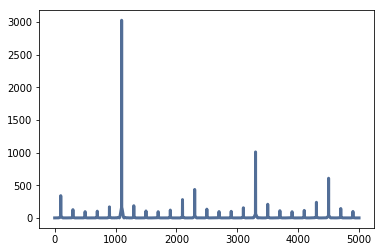

In [140]:
squerepectrum = wave.make_spectrum()
squerepectrum.plot()

In [141]:
wave.make_audio()

2.3 소리만 듣고 aliased 되었다고 판단이 되지는 않지만 일단 소리가 듣기 매우 안좋다는 느낌이 듭니다.

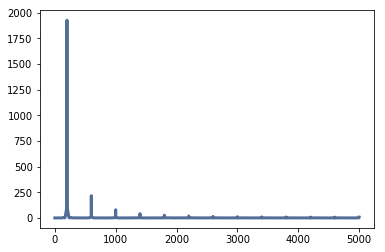

In [142]:
tripectrum.plot()

In [143]:
import numpy as np

hs = np.fft.rfft(wave.ys)
hs

array([ 0.20080321+0.j        ,  0.19607006+0.02180169j,
        0.18229845+0.04052017j, ...,  0.17500499+0.00227876j,
        0.18822686+0.00125648j,  0.19277108+0.j        ])

In [144]:
n = len(wave.ys)                
d = 1 / wave.framerate           
fs = np.fft.rfftfreq(n, d)
fs

array([  0.00000000e+00,   2.00000000e+00,   4.00000000e+00, ...,
         4.99600000e+03,   4.99800000e+03,   5.00000000e+03])

In [145]:
print(tripectrum.fs)

[  0.00000000e+00   2.00000000e+00   4.00000000e+00 ...,   4.99600000e+03
   4.99800000e+03   5.00000000e+03]


2.4 빈도가 0이라는 것은 파동이 존재하지 않는다는 것을 의미하는 것으로 보입니다.